In [2]:
import pandas as pd
import tushare as ts
import datetime
import matplotlib
from matplotlib.dates import DateFormatter, WeekdayLocator, DayLocator, MONDAY
import matplotlib.pyplot as plt
from matplotlib.finance import candlestick2_ochl
import matplotlib.ticker as ticker

ModuleNotFoundError: No module named 'matplotlib.finance'

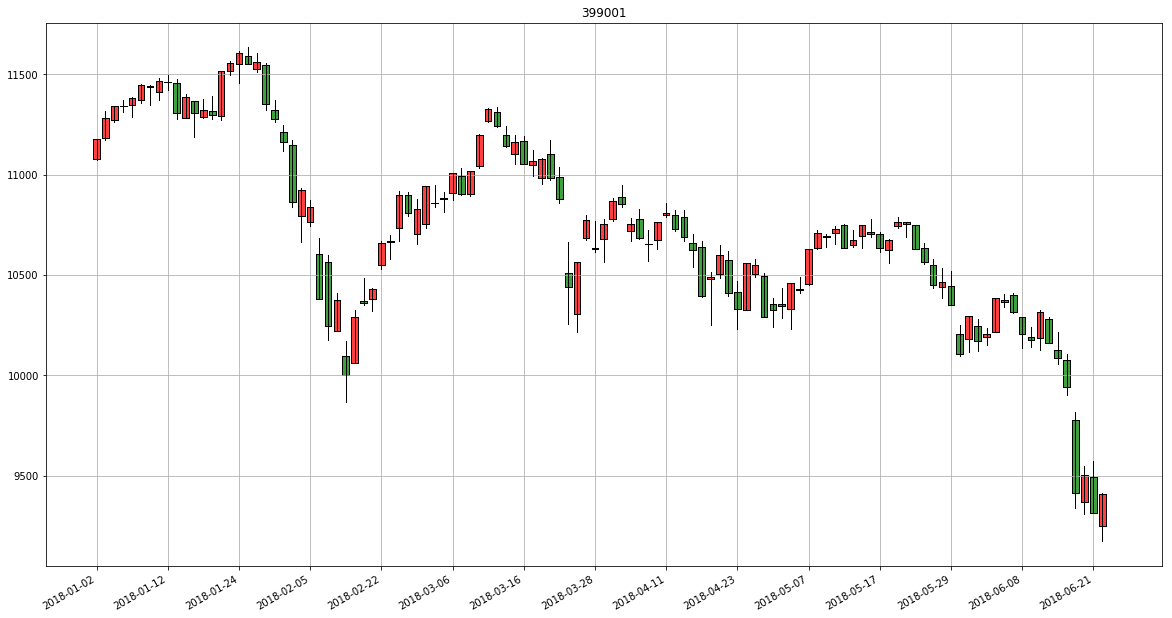

In [50]:
begin_date = '2018-01-01'
end_date = '2018-06-25'
code = "399001" #399001 深证成指 #000001 上证指数
df = ts.get_hist_data(code, start = begin_date, end = end_date)
df = df.sort_index(0)
df_idx = df.index.values

# df.plot()

fig, ax = plt.subplots(figsize=(20, 10)) # 设置图片大小。
# https://matplotlib.org/api/finance_api.html#module-matplotlib.finance
# matplotlib.finance.candlestick2_ochl(ax, opens, closes, highs, lows, width=4, colorup='r', colordown='g', alpha=0.75)
candlestick2_ochl(ax = ax, opens=df["open"].values, closes=df["close"].values, highs=df["high"].values, lows=df["low"].values, width=0.75, colorup='r', colordown='g', alpha=0.75)

ax.xaxis.set_major_locator(ticker.MaxNLocator(20))
# 设置自动格式化时间。
def mydate_formatter(x,pos):
    try:
        return df_idx[int(x)]
    except IndexError:
        return ''
ax.xaxis.set_major_formatter(ticker.FuncFormatter(mydate_formatter))

plt.setp(plt.gca().get_xticklabels(), rotation=30, horizontalalignment='right')
ax.grid(True)
plt.title(code)
plt.show()

In [3]:
df = ts.get_index() # 获取大盘指数实时行情列表
df = pd.DataFrame(df)
select = ['上证指数', '深证综指', '沪深300', '创业板指', '深证成指']
df = df.loc[df['name'].isin(select)]
df

,code,name,change,open,preclose,close,high,low,volume,amount
0,000001,上证指数,-1.05,2903.4495,2889.7603,2859.3364,2908.6240,2857.8709,121917687,1323.5047
10,000300,沪深300,-1.34,3625.7984,3608.9046,3560.4777,3631.0253,3559.0343,79877078,1066.9035
12,399001,深证成指,-0.90,9472.9120,9409.9530,9324.8310,9494.4380,9320.6620,15002142306,1755.5360
17,399006,创业板指,-0.72,1563.7440,1549.6610,1538.5650,1566.7770,1537.2700,1226246696,168.1529
21,399106,深证综指,-0.63,1608.2510,1597.3910,1587.3060,1612.5080,1586.4490,15002142306,1755.5360


In [4]:
select = ['code', 'name', 'pre_close', 'price', 'high', 'low', 'volume', 'amount', 'time', 'date']
pingan = ts.get_realtime_quotes('601318').loc[:, select]
moutai = ts.get_realtime_quotes('600519').loc[:, select]
cmb = ts.get_realtime_quotes('600036').loc[:, select]
midea = ts.get_realtime_quotes('000333').loc[:, select]
cib = ts.get_realtime_quotes('601166').loc[:, select]
gree = ts.get_realtime_quotes('000651').loc[:, select]
vanke = ts.get_realtime_quotes('000002').loc[:, select]
cmbc = ts.get_realtime_quotes('600016').loc[:, select]
yili = ts.get_realtime_quotes('600887').loc[:, select]
wuliangye = ts.get_realtime_quotes('000858').loc[:, select]
spdb = ts.get_realtime_quotes('600000').loc[:, select]
citics = ts.get_realtime_quotes('600030').loc[:, select]
ab = ts.get_realtime_quotes('601288').loc[:, select]
hrs = ts.get_realtime_quotes('600276').loc[:, select]
icbc = ts.get_realtime_quotes('601398').loc[:, select]
A50 = pd.concat([pingan, moutai, cmb, midea, cib, gree, vanke, cmbc, yili, wuliangye, spdb, hrs, citics, ab, icbc], axis = 0)
A50

,code,name,pre_close,price,high,low,volume,amount,time,date
0,601318,中国平安,61.070,59.790,61.350,59.600,60749672,3673033330.000,15:00:00,2018-06-25
0,600519,贵州茅台,766.530,765.560,778.970,764.900,3293416,2543272262.000,15:00:00,2018-06-25
0,600036,招商银行,28.620,27.670,28.710,27.650,48216015,1355187817.000,15:00:00,2018-06-25
0,000333,美的集团,53.650,52.900,54.140,52.860,27206565,1456438251.280,15:05:03,2018-06-25
0,601166,兴业银行,15.150,14.850,15.260,14.820,49675004,746810982.000,15:00:00,2018-06-25
0,000651,格力电器,48.060,47.760,48.990,47.550,51231492,2482119784.410,15:05:03,2018-06-25
0,000002,万 科Ａ,28.100,26.490,28.380,26.410,61581176,1686677902.780,15:05:03,2018-06-25
0,600016,民生银行,7.240,7.110,7.280,7.110,44960640,323950601.000,15:00:00,2018-06-25
0,600887,伊利股份,29.660,28.790,30.000,28.650,61068435,1789650196.000,15:00:00,2018-06-25
0,000858,五 粮 液,80.180,82.110,83.670,81.020,36660963,3029558089.270,15:05:03,2018-06-25
